# IT5100F Final Project

# Task 1: Problem Definition

Objective 1: Investigate the correlation between rental prices of Housing Development Board (HDB) flats in Singapore and various housing attributes. This entails analysing historical rental price data to discern how rental prices relate to different housing attributes, such as geographical location and year of construction, over the past years. The aim is to gain insights into the factors influencing rental prices.

Objective 2: Utilize machine learning to forecast rental prices. This objective involves constructing predictive models using machine learning algorithms on historical rental price data to forecast rental prices based on known housing attributes. By leveraging past trends and patterns, the objective is to offer guidance on rental pricing for homeowners.

Measurement of Success: 
The success of the data pipeline can be gauged based on several criteria: 
Accuracy of Predictions: For Objective 1, success is measured by the precision in identifying the impact of various housing attributes on rental prices through historical data analysis. For Objective 2, success is evaluated by the accuracy of machine learning models in predicting rental prices when provided with housing attributes.

Use Cases for the Data Pipeline: 
The data pipeline serves various purposes, including:
Reporting: Generating reports on historical rental prices, analysing the impact of housing attributes such as location and room types on rental prices, and providing summaries of machine learning predictions for rental prices.
Analytics: Conducting in-depth analysis of historical rental prices and uncovering the underlying factors influencing rental prices.
Machine Learning: Developing and deploying machine learning models to forecast rental prices based on historical data, empowering homeowners to make informed decisions regarding rental pricing.

# Task 2: Data collection/curation

The potential sources of data that help to achieve the objective are the HDB rental price and the features of the HDB like address, type, and so on. So we searched the relative data from data.gov.sg and downloaded them. Here are the links of data sources:

Renting Out of Flats 2024 dataset: https://beta.data.gov.sg/datasets/d_c9f57187485a850908655db0e8cfe651/view

Renting Out of Flats 2024 dataset has many records of approved rental transactions including monthly rent and some features. But the features are not enough. So we need more datasets. 

HDB Property Information dataset: https://beta.data.gov.sg/datasets/d_17f5382f26140b1fdae0ba2ef6239d2f/view

The HDB Property Information dataset has comprehensive property details about HDB blocks, including their address, completion year, facilities, types, and so on. It can provide more features to analyze and predict rental prices. 

Resale Flat Price with different periods: https://beta.data.gov.sg/collections/189/datasets/d_ebc5ab87086db484f88045b47411ebc5/view

As we all know, the floor area has a significant impact on the rental price. However, we fail to find the floor area data of approved rental transactions. Resale flat price datasets with different periods have one significant feature called floor area.  So in the next step, we will calculate the average, maximum and minimum floor area of the resale transactions with the same address of rental transactions and add them to our target dataset.

We need to get enough useful features to analyze the rental price. So we need to combine these two datasets using address (block and street) to get our target dataset. In the next step, by combining these datasets, we will have enough features to complete our objective.

In [ ]:
import pandas as pd

RNG = 42
hdb_property_df = pd.read_csv('HDBPropertyInformation.csv')
renting_df = pd.read_csv('RentingOutofFlats2024CSV.csv')
resale_list = [
    pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv"),
    pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv"),
    pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv"),
    pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv"),
    pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"),
]
resale = pd.concat(resale_list, ignore_index=True)

In [ ]:
hdb_property_df.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,54,0,1,0,0,0,0,0,0,0


In [ ]:
renting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118593 entries, 0 to 118592
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   rent_approval_date  118593 non-null  object
 1   town                118593 non-null  object
 2   block               118593 non-null  object
 3   street_name         118593 non-null  object
 4   flat_type           118593 non-null  object
 5   monthly_rent        118593 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.4+ MB


# Task 3: Data preparation

## Merge Multiple `.csv` into One

Drop duplicated records.

In [ ]:
renting_df_duplicated = renting_df[renting_df.duplicated(keep=False)]
renting_df_duplicated

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
105263,2023-11,SEMBAWANG,468D,ADMIRALTY DR,EXECUTIVE,3500
106227,2023-11,SEMBAWANG,468D,ADMIRALTY DR,EXECUTIVE,3500
106281,2023-12,SERANGOON,203,SERANGOON CTRL,3-ROOM,3200
106327,2023-12,TOA PAYOH,113,LOR 1 TOA PAYOH,3-ROOM,2600
106331,2023-12,CENTRAL,1D,CANTONMENT RD,4-ROOM,5000
...,...,...,...,...,...,...
118415,2024-03,CENTRAL,1F,CANTONMENT RD,5-ROOM,4800
118512,2024-03,BUKIT BATOK,438C,BT BATOK WEST AVE 8,2-ROOM,2500
118534,2024-03,WOODLANDS,882,WOODLANDS ST 82,5-ROOM,3500
118543,2024-03,SENGKANG,273C,COMPASSVALE LINK,4-ROOM,3400


In [ ]:
renting_df_cleaned = renting_df.drop_duplicates(keep='first')
renting_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118422 entries, 0 to 118592
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   rent_approval_date  118422 non-null  object
 1   town                118422 non-null  object
 2   block               118422 non-null  object
 3   street_name         118422 non-null  object
 4   flat_type           118422 non-null  object
 5   monthly_rent        118422 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 6.3+ MB


In [ ]:
hdb_property_df_duplicated = hdb_property_df[hdb_property_df.duplicated(keep=False)]
hdb_property_df_duplicated

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental


Merge the two datasets on the `street name` and `block number`.

In [ ]:
df1_join_columns = hdb_property_df[["street", "blk_no"]]
df1_join_columns

,street,blk_no
0,BEACH RD,1
1,BEDOK STH AVE 1,1
2,CANTONMENT RD,1
3,CHAI CHEE RD,1
4,CHANGI VILLAGE RD,1
...,...,...
12872,BUANGKOK CRES,998A
12873,BUANGKOK CRES,998B
12874,BUANGKOK CRES,999
12875,BUANGKOK CRES,999A


In [ ]:
df2_join_columns = renting_df_cleaned[["street_name", "block"]]
df2_join_columns

,street_name,block
0,ANG MO KIO AVE 4,105
1,ANG MO KIO AVE 4,107
2,ANG MO KIO AVE 4,108
3,ANG MO KIO AVE 4,111
4,ANG MO KIO AVE 4,111
...,...,...
118588,LOR 1 TOA PAYOH,109
118589,UBI AVE 1,318
118590,INDUS RD,78
118591,CORPORATION DR,351


In [ ]:
hdb_rental_df = pd.merge(hdb_property_df, renting_df_cleaned, left_on=["street", "blk_no"], right_on=["street_name", "block"], how="inner")
hdb_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118374 entries, 0 to 118373
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   blk_no                 118374 non-null  object
 1   street                 118374 non-null  object
 2   max_floor_lvl          118374 non-null  int64 
 3   year_completed         118374 non-null  int64 
 4   residential            118374 non-null  object
 5   commercial             118374 non-null  object
 6   market_hawker          118374 non-null  object
 7   miscellaneous          118374 non-null  object
 8   multistorey_carpark    118374 non-null  object
 9   precinct_pavilion      118374 non-null  object
 10  bldg_contract_town     118374 non-null  object
 11  total_dwelling_units   118374 non-null  int64 
 12  1room_sold             118374 non-null  int64 
 13  2room_sold             118374 non-null  int64 
 14  3room_sold             118374 non-null  int64 
 15  

We need to generate more attributes to help our approach. As task two said, the floor area has a potential impact on the rental price. So we would complement them to the features of the rental dataset, because of a lack of the average and max and min floor area.

In [ ]:
# we use this to get the average and max and min floor area of resale.

def clean_data(resale):
    #
    resale.insert(0, "year", resale["month"].str.split('-').str[0], True)
    #
    resale['remaining_lease'] = (99 + resale['lease_commence_date'].astype(int)) - resale['year'].astype(int)
    # lease_commence_date convert to str type
    resale['lease_commence_date'] = resale['lease_commence_date'].astype(str)
    #
    resale['flat_type'] = resale['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')
    #
    flat_model_replace = {'NEW GENERATION': 'New Generation', 'SIMPLIFIED': 'Simplified', 'STANDARD': 'Standard',
                          'MODEL A-MAISONETTE': 'Model A-Maisonette', 'MULTI GENERATION': 'Multi Generation',
                          'IMPROVED-MAISONETTE': 'Improved-Maisonette', '2-ROOM': '2-room', 'MODEL A': 'Model A',
                          'MAISONETTE': 'Maisonette', 'IMPROVED': 'Improved', 'TERRACE': 'Terrace',
                          'PREMIUM APARTMENT': 'Premium Apartment', 'APARTMENT': 'Apartment'}
    resale['flat_model'] = resale['flat_model'].replace(flat_model_replace)
    return resale

resale = clean_data(resale)

def calculate_avg_max_min_price(resale):
    resale['average_floor_area_sqm'] = resale.groupby(['block', 'street_name'])['floor_area_sqm'].transform('mean').round(2)
    resale['max_floor_area_sqm'] = resale.groupby(['block', 'street_name'])['floor_area_sqm'].transform('max')
    resale['min_floor_area_sqm'] = resale.groupby(['block', 'street_name'])['floor_area_sqm'].transform('min')
    return resale

resale = calculate_avg_max_min_price(resale)
# print(resale.head())
unique_resale = resale[['block', 'street_name', 'average_floor_area_sqm', 'max_floor_area_sqm', 'min_floor_area_sqm']].drop_duplicates()

unique_resale.to_csv("resale_with_area.csv", index=False)
print("File has been saved successfully.")

File has been saved successfully.


In [ ]:
resale_df = pd.read_csv('resale_with_area.csv')
hdb_rental_df = pd.merge(resale_df, hdb_rental_df, on=["street_name", "block"], how="inner")
hdb_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118073 entries, 0 to 118072
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   block                   118073 non-null  object 
 1   street_name             118073 non-null  object 
 2   average_floor_area_sqm  118073 non-null  float64
 3   max_floor_area_sqm      118073 non-null  float64
 4   min_floor_area_sqm      118073 non-null  float64
 5   blk_no                  118073 non-null  object 
 6   street                  118073 non-null  object 
 7   max_floor_lvl           118073 non-null  int64  
 8   year_completed          118073 non-null  int64  
 9   residential             118073 non-null  object 
 10  commercial              118073 non-null  object 
 11  market_hawker           118073 non-null  object 
 12  miscellaneous           118073 non-null  object 
 13  multistorey_carpark     118073 non-null  object 
 14  precinct_pavilion   

Have a look at the tag type columns, i.e. columns with only Y/N values.

In [ ]:
col_Y_N = ['residential', 'commercial', 'market_hawker', 'miscellaneous', 'multistorey_carpark', 'precinct_pavilion']

sub = hdb_rental_df[col_Y_N].replace({"Y": 1, "N": 0})
print(f"Total rows: {len(sub)}")
print("How many Y in each column?")
sub.sum(axis=0)

Total rows: 118073
How many Y in each column?


residential            118073
commercial              24050
market_hawker              36
miscellaneous           37328
multistorey_carpark        28
precinct_pavilion         116
dtype: int64

## Select the Columns of Interest

In [ ]:
useful_features = ["blk_no", "street", "max_floor_lvl", "year_completed", "commercial", "market_hawker",
                "miscellaneous","multistorey_carpark", "precinct_pavilion", "total_dwelling_units",
                'rent_approval_date', 'town', 'flat_type', 'average_floor_area_sqm', 'max_floor_area_sqm', 'min_floor_area_sqm'
]
target_feature = ["monthly_rent"]

selected_df = hdb_rental_df[useful_features + target_feature].reset_index(drop=True)
selected_df

,blk_no,street,max_floor_lvl,year_completed,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,total_dwelling_units,rent_approval_date,town,flat_type,average_floor_area_sqm,max_floor_area_sqm,min_floor_area_sqm,monthly_rent
0,216,ANG MO KIO AVE 1,10,1975,N,N,N,N,N,144,2021-03,ANG MO KIO,4-ROOM,75.23,88.0,73.0,2100
1,216,ANG MO KIO AVE 1,10,1975,N,N,N,N,N,144,2021-04,ANG MO KIO,3-ROOM,75.23,88.0,73.0,1700
2,216,ANG MO KIO AVE 1,10,1975,N,N,N,N,N,144,2021-07,ANG MO KIO,3-ROOM,75.23,88.0,73.0,1800
3,216,ANG MO KIO AVE 1,10,1975,N,N,N,N,N,144,2021-07,ANG MO KIO,3-ROOM,75.23,88.0,73.0,1750
4,216,ANG MO KIO AVE 1,10,1975,N,N,N,N,N,144,2021-09,ANG MO KIO,3-ROOM,75.23,88.0,73.0,2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118068,460B,BT BATOK WEST AVE 9,17,2019,N,N,N,N,N,144,2024-03,BUKIT BATOK,2-ROOM,93.00,93.0,93.0,2500
118069,460B,BT BATOK WEST AVE 9,17,2019,N,N,N,N,N,144,2024-03,BUKIT BATOK,2-ROOM,93.00,93.0,93.0,2350
118070,82B,CIRCUIT RD,19,2019,N,N,Y,N,N,234,2021-03,GEYLANG,3-ROOM,68.00,68.0,68.0,1100
118071,82B,CIRCUIT RD,19,2019,N,N,Y,N,N,234,2021-06,GEYLANG,4-ROOM,68.00,68.0,68.0,2750


In [ ]:
hdb_rental_df_processed = selected_df.copy()
hdb_rental_df_processed['rent_approval_date'] = pd.to_datetime(hdb_rental_df_processed['rent_approval_date'], format='%Y-%m')
hdb_rental_df_processed = hdb_rental_df_processed.replace({"Y": 1, "N": 0})
hdb_rental_df_processed

,blk_no,street,max_floor_lvl,year_completed,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,total_dwelling_units,rent_approval_date,town,flat_type,average_floor_area_sqm,max_floor_area_sqm,min_floor_area_sqm,monthly_rent
0,216,ANG MO KIO AVE 1,10,1975,0,0,0,0,0,144,2021-03-01,ANG MO KIO,4-ROOM,75.23,88.0,73.0,2100
1,216,ANG MO KIO AVE 1,10,1975,0,0,0,0,0,144,2021-04-01,ANG MO KIO,3-ROOM,75.23,88.0,73.0,1700
2,216,ANG MO KIO AVE 1,10,1975,0,0,0,0,0,144,2021-07-01,ANG MO KIO,3-ROOM,75.23,88.0,73.0,1800
3,216,ANG MO KIO AVE 1,10,1975,0,0,0,0,0,144,2021-07-01,ANG MO KIO,3-ROOM,75.23,88.0,73.0,1750
4,216,ANG MO KIO AVE 1,10,1975,0,0,0,0,0,144,2021-09-01,ANG MO KIO,3-ROOM,75.23,88.0,73.0,2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118068,460B,BT BATOK WEST AVE 9,17,2019,0,0,0,0,0,144,2024-03-01,BUKIT BATOK,2-ROOM,93.00,93.0,93.0,2500
118069,460B,BT BATOK WEST AVE 9,17,2019,0,0,0,0,0,144,2024-03-01,BUKIT BATOK,2-ROOM,93.00,93.0,93.0,2350
118070,82B,CIRCUIT RD,19,2019,0,0,1,0,0,234,2021-03-01,GEYLANG,3-ROOM,68.00,68.0,68.0,1100
118071,82B,CIRCUIT RD,19,2019,0,0,1,0,0,234,2021-06-01,GEYLANG,4-ROOM,68.00,68.0,68.0,2750


In [ ]:
hdb_rental_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118073 entries, 0 to 118072
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   blk_no                  118073 non-null  object        
 1   street                  118073 non-null  object        
 2   max_floor_lvl           118073 non-null  int64         
 3   year_completed          118073 non-null  int64         
 4   commercial              118073 non-null  int64         
 5   market_hawker           118073 non-null  int64         
 6   miscellaneous           118073 non-null  int64         
 7   multistorey_carpark     118073 non-null  int64         
 8   precinct_pavilion       118073 non-null  int64         
 9   total_dwelling_units    118073 non-null  int64         
 10  rent_approval_date      118073 non-null  datetime64[ns]
 11  town                    118073 non-null  object        
 12  flat_type               118073

## Perform Feature Engineering

Extract `month` and `year` as separate features.

In [ ]:
hdb_rental_df_processed["rent_approval_date"] = pd.to_datetime(hdb_rental_df_processed["rent_approval_date"])
hdb_rental_df_processed["month"] = hdb_rental_df_processed["rent_approval_date"].dt.month
hdb_rental_df_processed["year"] = hdb_rental_df_processed["rent_approval_date"].dt.year

Introduce a new feature called `month increment`, which converts the `month` to a consecutive number sequence.
For example: `2021-1` -> 1, `2021-2` -> 2, ..., `2022-1` -> 13, `2022-2` -> 14, ...
Having this feature can help our model to predict the rent of any month in the future.

In [ ]:
first_year = min(hdb_rental_df_processed["year"])
hdb_rental_df_processed["month_increment"] = (hdb_rental_df_processed["year"] - first_year) * 12 + hdb_rental_df_processed["month"]
hdb_rental_df_processed["month_increment"]

0          3
1          4
2          7
3          7
4          9
          ..
118068    39
118069    39
118070     3
118071     6
118072    34
Name: month_increment, Length: 118073, dtype: int32

Generate a new feature `building_age`.
`building_age` = `renting_out_year` - `year_of_building_completed`

In [ ]:
hdb_rental_df_processed["building_age"] = hdb_rental_df_processed["year"] - hdb_rental_df_processed["year_completed"]
hdb_rental_df_processed["building_age"]

0         46
1         46
2         46
3         46
4         46
          ..
118068     5
118069     5
118070     2
118071     2
118072     4
Name: building_age, Length: 118073, dtype: int64

# Task 4: Exploratory data analysis and visualization

In this section, we perform exploratory data analysis to acquire more insights into the dataset before constructing models.

As shown in the histplot below, the majority of monthly rental prices in the dataset are between 1000 to 5000 SGD. The most common rental prices are around 2000 to 3000 SGD.

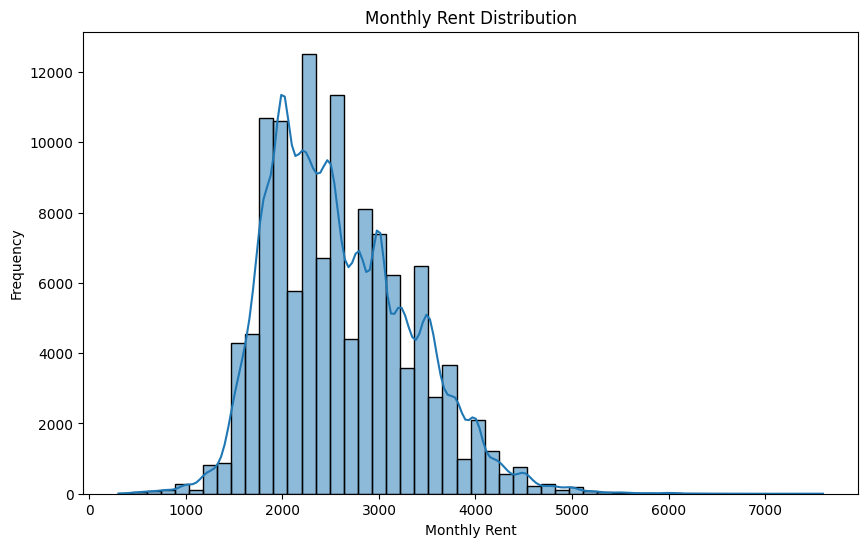

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 月租金分布
plt.figure(figsize=(10, 6))
sns.histplot(hdb_rental_df['monthly_rent'], bins=50, kde=True)
plt.title('Monthly Rent Distribution')
plt.xlabel('Monthly Rent')
plt.ylabel('Frequency')
plt.show()

The dataset classifies the flats into 6 types: 1-room, 2-room, 3-room, 4-room, 5-room and executive. We draw a boxplot below to discover the monthly rent distribution within each category. Generally, the more rooms a flat has, the higher its monthly rent will be. It seems that HDB flats under the 'executive' category have the highest median monthly rent.

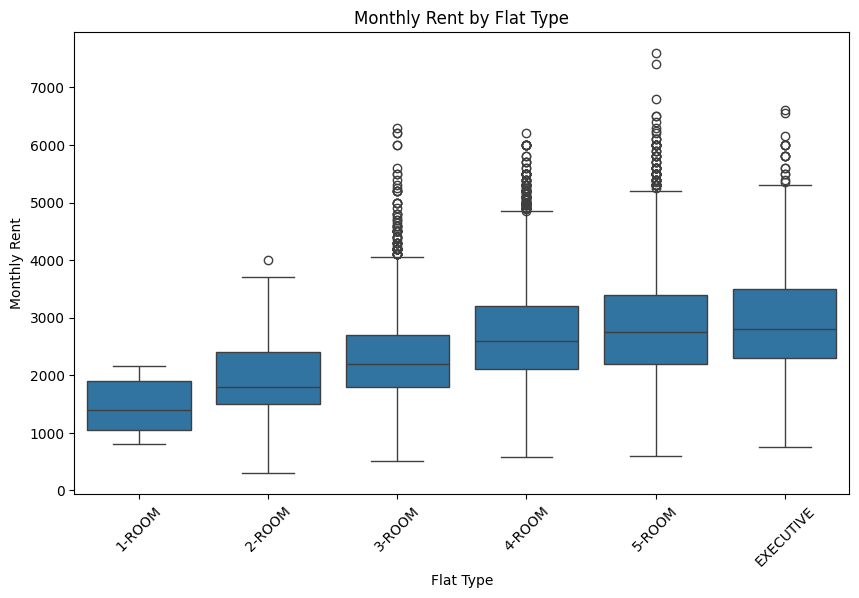

In [ ]:
hdb_rental_df_processed['flat_type'] = pd.Categorical(hdb_rental_df['flat_type'], 
                                            categories=['1-ROOM', '2-ROOM', '3-ROOM', '4-ROOM', '5-ROOM', 'EXECUTIVE'],
                                            ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='flat_type', y='monthly_rent', data=hdb_rental_df_processed)
plt.title('Monthly Rent by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Monthly Rent')
plt.xticks(rotation=45)
plt.show()

A total of 26 towns (which is exactly the total number of towns in Singapore!) are included in the dataset. The monthly rent difference among different towns are not very significant, but we can confirm that the data correctly reflects some features in the real world. For example, the median monthly rent in Bishan, Bukit Merah, Bukit Timah, Central area, Queenstown and Punggol are the highest. Besides, we can spot a few outliers with more than 7000 SGD/month in the Central region and Geylang.

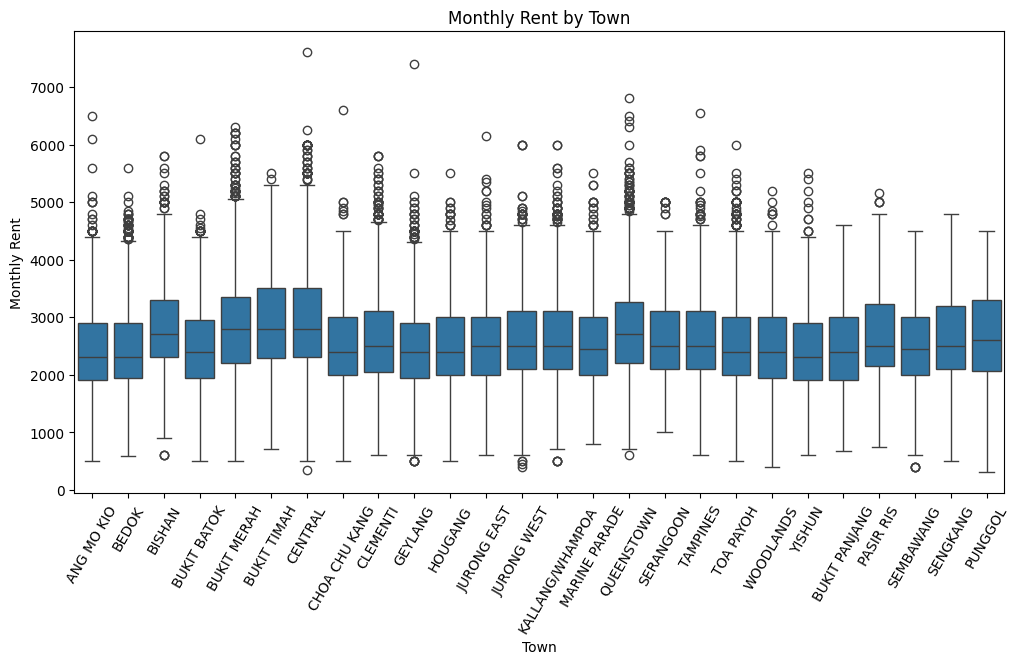

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='town', y='monthly_rent', data=hdb_rental_df_processed)
plt.title('Monthly Rent by Town')
plt.xlabel('Town')
plt.ylabel('Monthly Rent')
plt.xticks(rotation=60)
plt.show()

We select the top 30 streets with the highest median monthly rent and plot the boxplot below.

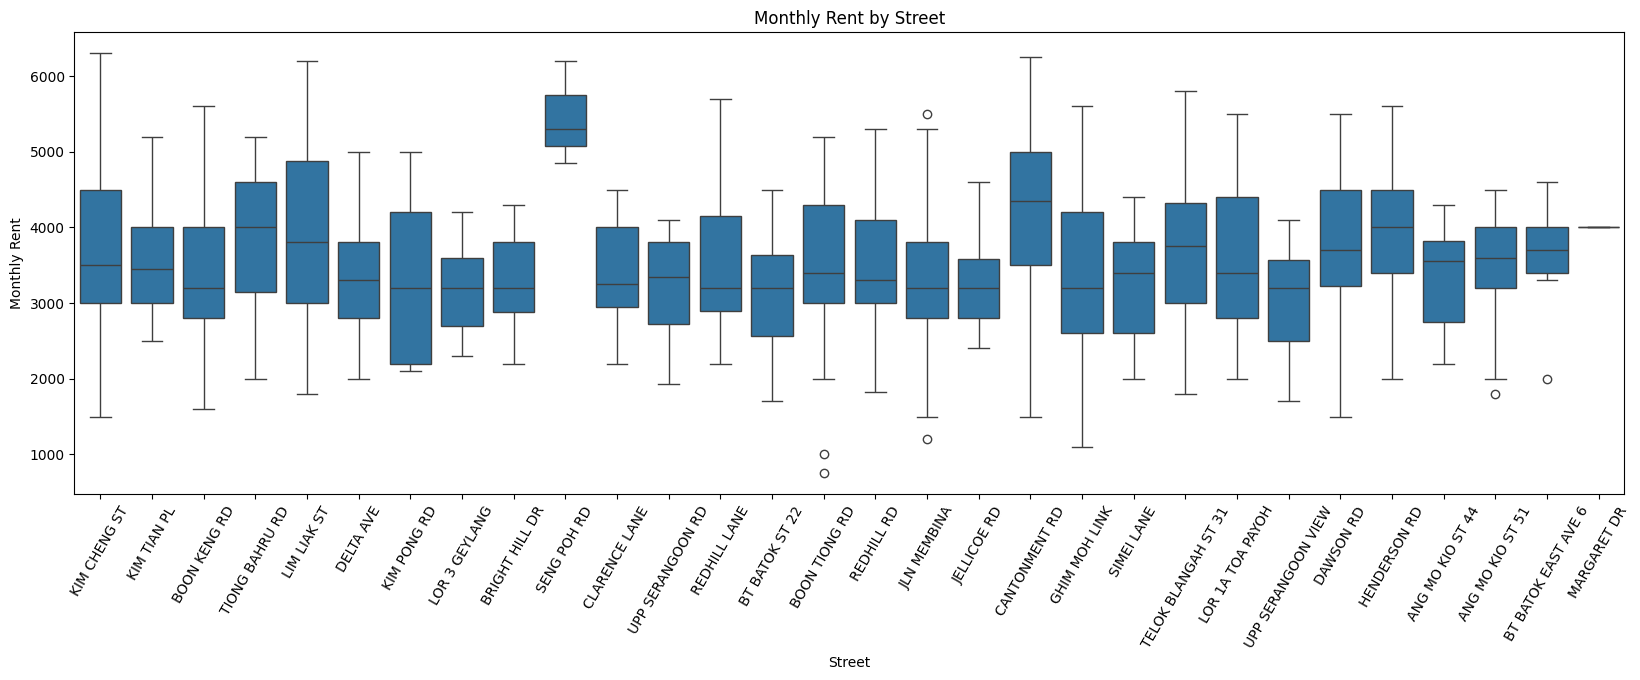

In [ ]:
top_30_streets = hdb_rental_df_processed.groupby('street')['monthly_rent'].median().nlargest(30).index
hdb_rental_df_top_30 = hdb_rental_df_processed[hdb_rental_df_processed['street'].isin(top_30_streets)]
plt.figure(figsize=(20, 6))
sns.boxplot(x='street', y='monthly_rent', data=hdb_rental_df_top_30)
plt.title('Monthly Rent by Street')
plt.xlabel('Street')
plt.ylabel('Monthly Rent')
plt.xticks(rotation=60)
plt.show()

First, we'll use the Folium library to generate a map of Singapore. Then, we'll use the Nominatim function from the Geopy library to obtain the latitude and longitude coordinates of all the streets in Singapore included in the dataset. After that, we'll plot points on the generated map based on the mean value of the rental price.

In [ ]:
street_coordinates = {'BEACH RD': (1.3011347, 103.8612729), 'BEDOK STH AVE 1': (1.314035, 103.933751), 'CHAI CHEE RD': (1.3253011, 103.9232041), 'CHANGI VILLAGE RD': (1.3885924, 103.9873252), 'DELTA AVE': (1.2920467, 103.8269271), 'DOVER RD': (1.3055652, 103.7807269), 'EVERTON PK': (1.2771286000000002, 103.8393679151902), 'GHIM MOH RD': (1.3118159, 103.7889207), 'HAIG RD': (1.3140113, 103.8955516), 'HOUGANG AVE 3': (1.3592584, 103.8931663), 'KG KAYU RD': (1.3027191, 103.882608), 'MARINE TER': (1.3052176, 103.9170612), 'MARSILING DR': (1.4457651, 103.7726015), 'PINE CL': (1.3067741, 103.8827322), "QUEEN'S RD": (1.31932, 103.8081976), "ST. GEORGE'S RD": (1.3240116, 103.8613424), 'TECK WHYE AVE': (1.3778102, 103.7560878), 'TELOK BLANGAH CRES': (1.2774161, 103.81906217374383), 'TOH YI DR': (1.3386719, 103.7717407), 'CANTONMENT RD': (1.279839, 103.8396154), 'EUNOS CRES': (1.3207219000000001, 103.90366668019519), 'GLOUCESTER RD': (1.3120751, 103.8530729), 'HOLLAND AVE': (1.3071575, 103.7938871), 'JLN RUMAH TINGGI': (1.2886143, 103.8091816), 'JLN BATU': (1.3018778, 103.8821697), 'JLN KUKOH': (1.2873012, 103.8400429), 'JOO SENG RD': (1.3381503, 103.8845661), 'SELEGIE RD': (1.2997767, 103.849582), 'BENDEMEER RD': (1.3231722, 103.8669373), 'BOON TIONG RD': (1.2864777, 103.8326547), 'BEDOK STH AVE 2': (1.3236346, 103.9371881), 'WHAMPOA DR': (1.3247804, 103.8575791), 'AH HOOD RD': (1.3279555, 103.8474534), 'ALJUNIED CRES': (1.3188679, 103.8858259), 'ANG MO KIO AVE 3': (1.3698132, 103.8543452), 'BEDOK RESERVOIR RD': (1.3380936, 103.9243273), 'BISHAN ST 12': (1.3459648, 103.8500475), 'CLEMENTI ST 14': (1.3232953, 103.769022), 'GANGSA RD': (1.3763602, 103.7653599), 'HENDERSON CRES': (1.2890964, 103.8220094), 'HOUGANG AVE 1': (1.3586299, 103.8892702), 'JLN RAJAH': (1.3278567, 103.8485871), 'JURONG EAST ST 13': (1.3384266, 103.734212), 'PASIR RIS ST 12': (1.3653667, 103.9578595), 'POTONG PASIR AVE 1': (1.3330432, 103.8680673), 'RIVERVALE WALK': (1.3841615, 103.9001564), 'SIMEI ST 1': (1.3416311, 103.9518972), 'TAMPINES ST 11': (1.3456408, 103.9488655), 'TECK WHYE LANE': (1.3780525, 103.7546431), 'TOWNER RD': (1.3206001, 103.8578367), 'WOODLANDS ST 13': (1.4361452, 103.7721444), 'YISHUN AVE 5': (1.4302981, 103.829613), 'BIDADARI PK DR': (1.3389946, 103.8726369), 'LOR 2 TOA PAYOH': (1.3353906, 103.8497414), 'PUNGGOL FIELD': (1.3956591, 103.9109446), 'CANBERRA ST': (1.446229, 103.8336352), 'JLN DUSUN': (1.3272918, 103.8439523), 'LENGKONG TIGA': (1.3235059, 103.9129133), 'YISHUN RING RD': (1.4182302, 103.8335768), 'DEPOT RD': (1.2802144, 103.8171852), 'EDGEFIELD PLAINS': (1.4044598, 103.9116123), 'ANG MO KIO ST 11': (1.3716034, 103.8330131), 'ANG MO KIO AVE 4': (1.380906, 103.8395363), 'CLEMENTI ST 12': (1.322903, 103.7700876), 'MCNAIR RD': (1.3186227, 103.8574261), 'CANBERRA WALK': (1.4462619, 103.8282311), 'CLEMENTI ST 11': (1.3140256, 103.7624098), 'PASIR RIS ST 11': (1.3661233, 103.956679), 'WHAMPOA RD': (1.32688, 103.8552135), 'EDGEDALE PLAINS': (1.3942798, 103.9101559), 'CANTONMENT CL': (1.2751048, 103.8406017), 'FARRER PK RD': (1.3119665, 103.8512324), 'HOLLAND DR': (1.3111476, 103.7926552), 'CLEMENTI ST 13': (1.3246965, 103.7716758), 'HO CHING RD': (1.3343618, 103.7231805), 'LOR 3 GEYLANG': (1.3157404, 103.8950466), 'PENDING RD': (1.3753188, 103.7706678), 'ALKAFF CRES': (1.3363242, 103.8722637), 'TAO CHING RD': (1.3327942, 103.7232301), 'ALJUNIED AVE 2': (1.3203838, 103.8874476), 'MARSILING RISE': (1.4382596, 103.782167), 'JLN AYER': (1.3112204, 103.8724674), 'CANBERRA CRES': (1.4456695, 103.8305639), 'JLN TENTERAM': (1.3269848, 103.8594131), 'RIVERVALE DR': (1.3923023, 103.9050047), 'JLN MEMBINA': (1.2859312, 103.8272492), 'KIM TIAN RD': (1.2831219, 103.8293322), 'DOVER CL EAST': (1.3035578, 103.7872128), 'KG ARANG RD': (1.3000675, 103.8821699), 'MARSILING LANE': (1.445688, 103.7730158), 'TAMAN HO SWEE': (1.2873279, 103.8308014), 'GEYLANG EAST CTRL': (1.32027145, 103.88738263636108), 'KIM TIAN PL': (1.2830619, 103.8276613), 'PAYA LEBAR WAY': (1.3239298, 103.8850491), 'YISHUN ST 11': (1.4304225, 103.8334205), 'YUAN CHING RD': (1.3267434, 103.7253182), 'SENGKANG EAST WAY': (1.3942818, 103.8905223), 'ANG MO KIO AVE 6': (1.3807921, 103.8441881), 'GEYLANG EAST AVE 1': (1.3162265, 103.8850665), 'ALJUNIED RD': (1.3148452, 103.8818945), 'RIVERVALE ST': (1.3882515, 103.9038371), 'PUNGGOL FIELD WALK': (1.390979, 103.9117152), 'CLARENCE LANE': (1.2919188, 103.8139693), 'GEYLANG EAST AVE 2': (1.3181686, 103.889075), 'CASHEW RD': (1.3712261, 103.7669911), 'CHOA CHU KANG AVE 1': (1.3761344, 103.7426366), 'CANBERRA VIEW': (1.4432576, 103.832296), 'MARSILING RD': (1.4423521, 103.780422), 'POTONG PASIR AVE 3': (1.3322826, 103.8652817), 'PETIR RD': (1.3716532, 103.7746064), 'TAMPINES ST 12': (1.3506032, 103.9446008), 'CORPORATION DR': (1.329087, 103.7228881), 'SIMEI ST 2': (1.3440456, 103.9556206), 'RIVERVALE CRES': (1.3921459, 103.9054033), 'MEI LING ST': (1.2924402, 103.8025423), 'POTONG PASIR AVE 2': (1.3330707, 103.8681571), 'BISHAN ST 11': (1.3480424, 103.8493381), 'TAMPINES AVE 5': (1.3570657, 103.9317448), 'PASIR RIS ST 13': (1.3637359, 103.9608438), 'SILAT AVE': (1.2761185, 103.8306153), 'BEDOK STH RD': (1.3231038, 103.9274502), 'ANG MO KIO AVE 5': (1.3788857, 103.8745912), 'JLN TECK WHYE': (1.3798765, 103.7578395), 'YUNG HO RD': (1.3264866, 103.7240627), 'BISHAN ST 13': (1.3480761, 103.8499705), 'HOUGANG ST 11': (1.3511817, 103.8808388), 'BEDOK STH AVE 3': (1.3262535, 103.944147), 'SIMEI RD': (1.3469054, 103.9579944), 'YUNG LOH RD': (1.3275606, 103.7223301), 'PUNGGOL CTRL': (1.40044405, 103.91249296497608), 'STIRLING RD': (1.2959951, 103.8036823), 'YUNG KUANG RD': (1.3314268, 103.7235226), 'TECK WHYE CRES': (1.3814616, 103.7547597), 'WOODLANDS ST 11': (1.4338124, 103.7755979), 'PUNGGOL EAST': (1.3970004, 103.9178212), 'SIMEI LANE': (1.3433818, 103.9586658), 'QUEENSWAY': (1.2934635, 103.7988997), 'DOVER CRES': (1.3066739, 103.7829609), 'SENG POH RD': (1.2842235, 103.8322211), 'TIONG BAHRU RD': (1.2875303, 103.8234119), 'CIRCUIT RD': (1.3269083, 103.888088), 'YISHUN AVE 7': (1.4401524, 103.8371154), 'SENGKANG EAST DR': (1.3868438, 103.9082882), 'BOON LAY DR': (1.341936, 103.7112516), 'LOMPANG RD': (1.3801296, 103.7655996), 'TOA PAYOH CTRL': (1.3326741, 103.85052221136597), 'YUNG SHENG RD': (1.3341551, 103.7225482), 'JELEBU RD': (1.3806992, 103.7635864), 'BOON LAY AVE': (1.3441324, 103.7071803), 'BALAM RD': (1.3308152, 103.8860884), 'LIM LIAK ST': (1.2852657, 103.8315003), "QUEEN'S CL": (1.2941053, 103.8003763), 'KIM KEAT AVE': (1.3324514, 103.8590986), 'PUNGGOL RD': (1.380319, 103.8969795), 'GEYLANG SERAI': (1.3170114, 103.897395), 'JLN KLINIK': (1.2880059, 103.8288153), 'TEBAN GDNS RD': (1.321714, 103.7426051), 'SENGKANG EAST RD': (1.3823267, 103.8887808), 'BISHAN ST 23': (1.3552931, 103.8464705), 'CLEMENTI AVE 6': (1.3248046, 103.7641559), 'JURONG EAST ST 21': (1.3394673, 103.7401132), 'SERANGOON CTRL': (1.3535142, 103.8716163518423), 'YISHUN ST 21': (1.43158, 103.8393154), 'COMPASSVALE DR': (1.3876892, 103.8974354), 'TAMPINES ST 21': (1.3544296, 103.9476969), 'WOODLEIGH LINK': (1.3408043, 103.8718047), 'TAMPINES ST 23': (1.3537686, 103.9543393), 'PASIR RIS ST 21': (1.3719206, 103.9621645), 'COMPASSVALE RD': (1.3924645, 103.8982603), 'ANG MO KIO AVE 1': (1.3601744, 103.8526288), 'CHOA CHU KANG CTRL': (1.3805764, 103.7479577), 'COMPASSVALE LANE': (1.3846179, 103.8969533), 'BOON LAY PL': (1.3453919, 103.7119287), 'PUNGGOL PL': (1.4007421, 103.901586), 'HOUGANG ST 21': (1.3589197, 103.8877769), 'SERANGOON AVE 4': (1.3570181, 103.8714251), 'PUNGGOL WALK': (1.4035004, 103.8999124), 'MARSILING CRES': (1.4472483, 103.7741977), 'SUMANG WALK': (1.4042332, 103.8949009), 'TAMPINES ST 24': (1.3549719, 103.9517084), 'BEDOK CTRL': (1.3247918, 103.932715), 'BOON KENG RD': (1.3177122, 103.8614157), 'GHIM MOH LINK': (1.3104503, 103.7844214), 'HAVELOCK RD': (1.2902363, 103.8266938), 'SIN MING RD': (1.3565287, 103.8383325), 'SUMANG LANE': (1.4018313, 103.8955119), 'SIMEI ST 4': (1.3412171, 103.9566436), 'COMPASSVALE WALK': (1.388325, 103.9003651), 'ANG MO KIO ST 23': (1.3674705, 103.840421), 'TOA PAYOH EAST': (1.3340336, 103.8549411), 'PASIR RIS DR 4': (1.3732557, 103.9608206), 'SERANGOON AVE 3': (1.3546341, 103.8704235), 'BAIN ST': (1.2968452, 103.8543064), 'BISHAN ST 22': (1.3598429, 103.844074), 'SERANGOON AVE 2': (1.3508868, 103.8709144), 'HOUGANG ST 22': (1.3556681, 103.8910059), 'BEO CRES': (1.2887829, 103.8278402), 'JURONG EAST ST 24': (1.3428347, 103.7388481), 'KIM KEAT LINK': (1.3309813, 103.8549025), 'SIMEI ST 5': (1.3435153, 103.9544438), 'YISHUN AVE 9': (1.4353129, 103.8432555), 'BANGKIT RD': (1.377041, 103.7737515), 'CHOA CHU KANG AVE 2': (1.3782081, 103.7414925), "ST. GEORGE'S LANE": (1.3223273, 103.8617865), 'COMPASSVALE ST': (1.3944239, 103.900848), 'ANG MO KIO ST 21': (1.3700853, 103.8352637), 'SERANGOON CTRL DR': (1.3546775, 103.8716025), 'YISHUN ST 22': (1.4367403, 103.8364584), 'ANG MO KIO AVE 2': (1.3762364, 103.834221), 'JLN BERSEH': (1.3072297, 103.8574837), 'PUNGGOL WAY': (1.4173752, 103.9057151), 'WATERLOO ST': (1.2988093, 103.8515727), 'BISHAN ST 24': (1.3575116, 103.8450951), 'COMPASSVALE BOW': (1.3814562, 103.8952359), 'TOH GUAN RD': (1.3353852, 103.7478521), 'COMPASSVALE LINK': (1.3854744, 103.8955153), 'QUEEN ST': (1.2999415, 103.8538098), 'JLN BAHAGIA': (1.3269731, 103.8583481), 'MARINE CRES': (1.3051384, 103.9133779), 'TELOK BLANGAH WAY': (1.2776297, 103.8178458), 'SENGKANG CTRL': (1.3886361, 103.8944854), 'JURONG WEST ST 24': (1.3503942, 103.7072413), 'TAMPINES ST 22': (1.3480236, 103.9523812), 'JURONG WEST AVE 3': (1.3537576, 103.7048317), 'JURONG WEST ST 25': (1.3539409, 103.7041986), 'CHOA CHU KANG AVE 3': (1.3847198, 103.7490562), 'SENGKANG EAST AVE': (1.3911995, 103.8830978), 'CASSIA CRES': (1.3098466, 103.884696), 'HOY FATT RD': (1.2904672, 103.8134044), 'KELANTAN RD': (1.3059098, 103.8561753), 'TELOK BLANGAH RISE': (1.2725845, 103.8213951), 'YISHUN AVE 6': (1.429532, 103.8494848), 'COMPASSVALE CRES': (1.3969533, 103.8988702), 'CHAI CHEE AVE': (1.325289, 103.9232643), 'YISHUN ST 20': (1.4357137, 103.8360055), 'HOLLAND CL': (1.308265, 103.794809), 'JOO CHIAT RD': (1.3156408, 103.8979621), 'MARGARET DR': (1.2966368, 103.8103536), 'CANBERRA RD': (1.4481368, 103.8223022), 'CLEMENTI AVE 4': (1.3208012, 103.7677252), 'HOUGANG AVE 5': (1.367381, 103.8962422), 'JURONG EAST ST 32': (1.3454092, 103.7339455), 'SHUNFU RD': (1.3519596, 103.8374602), 'TAMPINES ST 32': (1.3538082, 103.9600976), 'UBI AVE 1': (1.3256103, 103.8955825), 'WOODLANDS ST 31': (1.4309613, 103.7743082), 'ANCHORVALE DR': (1.3899558, 103.890907), 'YISHUN CTRL': (1.42645065, 103.83720383435042), 'ANCHORVALE LINK': (1.3940784, 103.890576), 'CHOA CHU KANG AVE 4': (1.3839732, 103.7433587), 'PUNGGOL DR': (1.4062428, 103.9073543), 'WOODLANDS AVE 1': (1.4274533, 103.7980169), 'ANCHORVALE RD': (1.3936709, 103.8873041), 'ANG MO KIO ST 31': (1.3659629, 103.8502546), 'TAMPINES ST 33': (1.3526925, 103.9579158), 'ANCHORVALE LANE': (1.3922931, 103.8857342), 'SEMBAWANG DR': (1.4528468, 103.8165773), 'SUMANG LINK': (1.4114829, 103.8982201), 'SEMBAWANG VISTA': (1.4474406, 103.8224621), 'HOUGANG AVE 7': (1.3624652, 103.8953421), 'JURONG EAST ST 31': (1.3461182, 103.7306892), 'SEMBAWANG CL': (1.4478981, 103.8166923), 'NEW MKT RD': (1.2871288, 103.8446653), 'TAH CHING RD': (1.3367691, 103.7219141), 'WOODLANDS ST 32': (1.4309678, 103.7800886), 'CLEMENTI AVE 5': (1.3171549, 103.7659172), 'SEMBAWANG CRES': (1.4448398, 103.820084), 'CLEMENTI AVE 2': (1.3158484, 103.7698581), 'JURONG EAST AVE 1': (1.3450544, 103.7324883), 'ANCHORVALE ST': (1.3960187, 103.8944385), 'TANGLIN HALT RD': (1.3025519, 103.7967925), 'KANG CHING RD': (1.3389196, 103.7217918), 'YISHUN ST 31': (1.4323238, 103.8471193), 'KRETA AYER RD': (1.279938, 103.8427366), 'ANCHORVALE CRES': (1.3987383, 103.8902838), 'SMITH ST': (1.2831765, 103.8426752), 'KIM CHENG ST': (1.2845581, 103.8319423), 'WHAMPOA WEST': (1.3198991, 103.864694), 'CHOA CHU KANG LOOP': (1.3863227, 103.7460543), 'YISHUN AVE 11': (1.4269498, 103.8419553), 'WOODLANDS AVE 3': (1.4314179, 103.7691206), 'ANG MO KIO ST 32': (1.3651045, 103.8501677), 'ADMIRALTY DR': (1.4519975, 103.8201685), 'SEMBAWANG WAY': (1.4497187, 103.8214217), 'WOODLANDS AVE 5': (1.4348392, 103.7885675), 'UBI RD 3': (1.3312622, 103.8979487), 'YUNG AN RD': (1.3355942, 103.7201743), 'TAMPINES ST 34': (1.3550538, 103.9607526), 'MOH GUAN TER': (1.2838767, 103.8306218), 'CAMBRIDGE RD': (1.3142195, 103.8473774), 'PINE LANE': (1.3093304, 103.8855352), 'HOUGANG ST 31': (1.3625633, 103.8901395), 'HOUGANG ST 32': (1.3634929, 103.8955593), 'KIM PONG RD': (1.285869, 103.8301037), 'EUNOS RD 2': (1.3216543, 103.8996471), 'JLN TIGA': (1.3088149, 103.8840956), 'TAMPINES AVE 7': (1.3583564, 103.9420958), 'SAGO LANE': (1.2814979, 103.8438008), 'SIMS DR': (1.3169191, 103.877961), 'FERNVALE LANE': (1.389514, 103.8700555), 'ADMIRALTY LINK': (1.4546543, 103.8165981), 'ANG MO KIO AVE 10': (1.371241, 103.8566847), 'FAJAR RD': (1.3821014, 103.7692829), 'HOUGANG AVE 10': (1.3736402, 103.8942396), 'PANDAN GDNS': (1.3195055, 103.74840801651041), 'SERANGOON AVE 1': (1.3443749, 103.8773362), 'TAMPINES ST 41': (1.3575354, 103.9462497), 'WOODLANDS ST 41': (1.4275446, 103.7752106), 'NORTHSHORE DR': (1.417966, 103.9104916), 'JURONG WEST ST 42': (1.3512918, 103.7262407), 'SIN MING AVE': (1.361845, 103.8395695), 'PASIR RIS DR 6': (1.3748147, 103.9562302), 'FERNVALE RD': (1.3971924, 103.8756985), 'SAUJANA RD': (1.3824196, 103.766833), 'CHAI CHEE ST': (1.3279551, 103.9247345), 'EUNOS RD 5': (1.3188304, 103.8964744), 'FERNVALE LINK': (1.3927354, 103.8790149), 'CLEMENTI AVE 1': (1.3078064, 103.768292), 'HOUGANG AVE 8': (1.3719589, 103.8859349), 'HOUGANG AVE 6': (1.3751827, 103.8927121), 'JURONG WEST AVE 1': (1.3507592, 103.7186231), 'NORTHSHORE CRES': (1.4170238, 103.9061279), 'CLEMENTI AVE 3': (1.3118677, 103.7655996), 'LENGKOK BAHRU': (1.2870933, 103.8139198), 'YISHUN AVE 1': (1.4222523, 103.8637252), 'SENGKANG WEST WAY': (1.3952033, 103.8767409), 'TAMPINES ST 43': (1.3617902, 103.9512272), 'SENGKANG WEST AVE': (1.3906254, 103.8755232), 'OWEN RD': (1.3161621, 103.8507944), 'TELOK BLANGAH DR': (1.2735238, 103.8059883), 'TAMPINES ST 42': (1.3585808, 103.9527601), 'BRIGHT HILL DR': (1.3602027, 103.8324481), 'JLN KAYU': (1.40266395, 103.87186413479495), 'YISHUN ST 41': (1.419641, 103.8447501), 'SEGAR RD': (1.3866727, 103.7721792), 'ANG MO KIO ST 44': (1.3675032, 103.8580793), 'JURONG WEST ST 41': (1.3494101, 103.7214042), 'SENGKANG WEST RD': (1.3919964, 103.8692212), 'CRAWFORD LANE': (1.3048464, 103.8625836), 'TAMPINES ST 44': (1.3596625, 103.9538853), 'PASIR RIS ST 41': (1.3722161, 103.957901), 'YISHUN ST 43': (1.4257123, 103.8520528), 'FERNVALE ST': (1.3985661, 103.8768102), 'YISHUN ST 42': (1.4257076, 103.8517721), 'CHOA CHU KANG AVE 5': (1.3746455, 103.7417804), 'YISHUN ST 44': (1.4283937, 103.8515216), 'DORSET RD': (1.3120884, 103.8483481), 'LOWER DELTA RD': (1.272628, 103.8237429), 'STRATHMORE AVE': (1.2941053, 103.8091216), 'TAMPINES AVE 9': (1.3604586, 103.9413577), 'TAMPINES ST 45': (1.3624096, 103.955691), 'WHAMPOA STH': (1.3250618, 103.8663299), 'FARRER RD': (1.31748125, 103.80746200268874), 'PASIR RIS ST 52': (1.3761471, 103.9469551), 'CHOA CHU KANG ST 51': (1.3899328, 103.7436359), 'JELAPANG RD': (1.3859027, 103.7672448), 'JURONG WEST ST 51': (1.3452961, 103.7217346), 'TAMPINES CTRL 1': (1.3544198, 103.9461139), 'WOODLANDS DR 14': (1.4332791, 103.7897839), 'WELLINGTON CIRCLE': (1.4529712, 103.8226911), 'YISHUN ST 51': (1.4180682, 103.8449155), 'CANBERRA LINK': (1.4432269, 103.83005), 'ANG MO KIO AVE 8': (1.3727292, 103.8481441), 'MONTREAL DR': (1.452022, 103.8243601), 'JURONG WEST ST 52': (1.3493462, 103.7176388), 'WEST COAST DR': (1.311674, 103.760315), 'YISHUN AVE 4': (1.414234, 103.8389551), 'KENT RD': (1.3155884, 103.8513859), 'WEST COAST RD': (1.2944334, 103.7668412), 'TAMPINES CTRL 7': (1.3589223, 103.9421946), 'TAMPINES CTRL 8': (1.3566839, 103.9404963), 'SIMS PL': (1.3158249, 103.8781368), 'PASIR RIS ST 51': (1.3689023, 103.9484188), 'CHIN SWEE RD': (1.2836851, 103.8361629), 'GEYLANG BAHRU': (1.3250214, 103.868098), 'PIPIT RD': (1.3238586, 103.8858371), 'PASIR RIS DR 1': (1.3654591, 103.9623202), 'HOUGANG ST 52': (1.3758752, 103.8899277), 'WOODLANDS DR 16': (1.431185, 103.7988345), 'CHOA CHU KANG ST 52': (1.3932339, 103.742965), 'HOUGANG ST 51': (1.3772089, 103.8849334), 'WOODLANDS DR 44': (1.4314251, 103.7944694), 'CHAI CHEE DR': (1.32588, 103.9193391), 'WOODLANDS DR 53': (1.4330392, 103.7972655), 'TELOK BLANGAH HTS': (1.2765592, 103.8116793), 'PASIR RIS ST 53': (1.3736297, 103.9478921), 'HOUGANG AVE 4': (1.3723545, 103.8854538), 'DAKOTA CRES': (1.3061784, 103.8839328), 'ANG MO KIO ST 52': (1.3726774, 103.8527972), 'ANG MO KIO ST 51': (1.370308, 103.8541149), 'MONTREAL LINK': (1.4500198, 103.827632), 'MARINE DR': (1.3043162, 103.9086469), 'CHOA CHU KANG ST 62': (1.3979713, 103.7453481), 'CLEMENTI WEST ST 1': (1.3045379, 103.7652697), 'ELIAS RD': (1.3803175, 103.9450627), 'JURONG WEST ST 62': (1.3407711, 103.7026833), 'SENJA RD': (1.382428, 103.7626201), 'WOODLANDS DR 42': (1.4369494, 103.7970096), 'YISHUN ST 61': (1.420748, 103.8370522), 'TAMPINES ST 61': (1.3627405, 103.9347638), 'JURONG WEST ST 65': (1.3405288, 103.7009502), 'WOODLANDS RING RD': (1.4369878, 103.79746), 'WOODLANDS AVE 4': (1.4378495, 103.7958338), 'WOODLANDS DR 52': (1.4344745, 103.7993807), "JLN MA'MOR": (1.3282091, 103.8574422), 'ANG MO KIO AVE 9': (1.3842667, 103.8450781), 'JURONG WEST ST 61': (1.3405145, 103.6976533), 'TAMPINES AVE 12': (1.3609279, 103.9422124), 'PASIR RIS DR 3': (1.36584, 103.9664706), 'WOODLANDS AVE 6': (1.4466713, 103.7975462), 'KALLANG BAHRU': (1.3163668, 103.8652819), 'VEERASAMY RD': (1.3075263, 103.8539906), 'TAMPINES ST 62': (1.3660536, 103.9384528), 'CHOA CHU KANG ST 64': (1.397105, 103.7501317), 'ROWELL RD': (1.3079022, 103.8559131), 'SENJA CL': (1.3880304, 103.7609176), 'PASIR RIS DR 10': (1.3792212, 103.9378436), 'JLN TENAGA': (1.3332174, 103.9062486), 'ANG MO KIO ST 61': (1.3828464, 103.8401822), 'SENJA LINK': (1.3865674, 103.7631662), 'CHOA CHU KANG CRES': (1.4014962, 103.7511156), 'JURONG WEST ST 64': (1.3408015, 103.7039775), 'BUFFALO RD': (1.306106, 103.8514849), 'JLN DAMAI': (1.3320712, 103.9094082), 'CHANDER RD': (1.3083601, 103.8515263), 'WOODLANDS DR 71': (1.4397415, 103.8002158), 'KLANG LANE': (1.3080428, 103.8519588), 'JURONG WEST CTRL 1': (1.3411846, 103.7047697), 'REDHILL CL': (1.288666, 103.8179907), 'RACE COURSE RD': (1.3134832, 103.8543018), 'WOODLANDS DR 62': (1.4389021, 103.8070377), 'WOODLANDS DR 73': (1.4411452, 103.805805), 'TESSENSOHN RD': (1.3149195, 103.855717), 'HOUGANG ST 61': (1.3746811, 103.8850711), 'CHOA CHU KANG DR': (1.3831071, 103.7479235), 'WOODLANDS DR 75': (1.4258236, 103.7935405), 'MOULMEIN RD': (1.3187287, 103.8440866), 'JURONG WEST CTRL 3': (1.3397575, 103.7041406), "C'WEALTH AVE": (1.3020355, 103.7983964), 'CHOA CHU KANG ST 53': (1.3909145, 103.74739), 'HOUGANG AVE 2': (1.3677716, 103.8866512), 'JURONG WEST ST 71': (1.3423405, 103.6957722), 'TAMPINES ST 71': (1.3585541, 103.9350521), 'WOODLANDS DR 40': (1.4419332, 103.7957447), 'CLEMENTI WEST ST 2': (1.3020268, 103.763772), 'WOODLANDS DR 70': (1.4407206, 103.798322), 'PASIR RIS ST 72': (1.3805112, 103.9362128), 'YISHUN ST 71': (1.4271738, 103.8301573), 'TAMPINES ST 72': (1.3594761, 103.9346639), 'JURONG WEST AVE 5': (1.3475316, 103.6970686), 'WOODLANDS CIRCLE': (1.4421879, 103.7972913), 'JURONG WEST ST 72': (1.3455187, 103.6995015), 'REDHILL RD': (1.287681, 103.8152579), 'YISHUN ST 72': (1.4276051, 103.8314467), 'JURONG WEST ST 73': (1.3472591, 103.6998614), 'JURONG WEST ST 75': (1.3458668, 103.7022429), 'PASIR RIS ST 71': (1.3733749, 103.9400746), 'BEDOK RESERVOIR CRES': (1.3365128, 103.9205668), 'JURONG WEST ST 74': (1.348515, 103.6991476), 'BEDOK RESERVOIR VIEW': (1.3383918, 103.9345534), 'YISHUN AVE 3': (1.4228286, 103.8347544), 'CHOA CHU KANG ST 54': (1.3943474, 103.7481232), 'WOODLANDS DR 60': (1.4469862, 103.7997689), 'INDUS RD': (1.2903741, 103.8296378), 'WOODLANDS CRES': (1.4455968, 103.8044489), 'YISHUN AVE 2': (1.4139673, 103.8315738), 'DAWSON RD': (1.2948837, 103.8106379), 'WOODLANDS AVE 9': (1.4544243, 103.8102291), 'WOODLANDS RISE': (1.4459249, 103.804176), 'WOODLANDS DR 72': (1.4428446, 103.8046935), 'EMPRESS RD': (1.3166945, 103.8065992), 'MARINE PARADE CTRL': (1.3017303, 103.9071866), 'TELOK BLANGAH ST 31': (1.2762667, 103.8067571), 'FRENCH RD': (1.3083286, 103.8601143), 'TAMPINES AVE 4': (1.3513124, 103.9385236), 'WOODLANDS ST 81': (1.442815, 103.7887119), 'KEAT HONG CL': (1.3743247, 103.7432349), 'HOUGANG CTRL': (1.3710492, 103.89435758379814), "KING GEORGE'S AVE": (1.3077127, 103.8595308), 'MACPHERSON LANE': (1.3312482, 103.8854337), 'REDHILL LANE': (1.2866736, 103.8187637), 'JURONG WEST ST 81': (1.3471992, 103.6947322), 'CHOA CHU KANG AVE 7': (1.3764883, 103.746142), 'JELLICOE RD': (1.3079957, 103.8623303), 'TAMPINES ST 81': (1.3503975, 103.932525), 'WOODLANDS ST 82': (1.4443615, 103.7932254), 'YISHUN ST 81': (1.4146152, 103.8352104), 'KEAT HONG LINK': (1.3751017, 103.74662), 'WOODLANDS ST 83': (1.4406905, 103.7923142), 'TAMPINES ST 82': (1.353284, 103.9390185), 'TAMPINES ST 83': (1.354203, 103.9348322), 'SIMS AVE': (1.3155328, 103.8849127), 'TAMPINES AVE 8': (1.3535066, 103.9310827), 'ZION RD': (1.2946255, 103.8307549), 'TAMPINES ST 86': (1.3548184, 103.9302067), 'TAMPINES ST 84': (1.3528162, 103.9322309), 'WOODLANDS DR 50': (1.4372242, 103.7932873), 'TAMPINES AVE 1': (1.3479917, 103.9301645), 'JLN SATU': (1.3084165, 103.8890671), 'JURONG WEST ST 91': (1.3408911, 103.6869452), 'HOUGANG ST 91': (1.3756631, 103.8800927), 'TAMPINES ST 91': (1.3465495, 103.9384243), 'HOUGANG AVE 9': (1.374539, 103.8846956), 'JURONG WEST ST 92': (1.3406204, 103.6901235), 'YISHUN CTRL 1': (1.4248178, 103.8352019), 'JLN DUA': (1.3089911, 103.8889383), 'HOUGANG ST 92': (1.374195, 103.8787635), 'OLD AIRPORT RD': (1.3064126, 103.8828278), 'HENDERSON RD': (1.2793712, 103.8170486), 'JURONG WEST ST 93': (1.3406797, 103.6916038), 'BUANGKOK CRES': (1.3841501, 103.88321), 'BUANGKOK LINK': (1.3793337, 103.8814126), 'BUANGKOK GREEN': (1.3792474, 103.8846155)}

import folium

m = folium.Map(location=[1.3521, 103.8198], zoom_start=12)

sorted_streets = sorted(street_coordinates.keys(), key=lambda x: hdb_rental_df_top_30.loc[hdb_rental_df_top_30['street'] == x, 'monthly_rent'].median(), reverse=True)

for street in sorted_streets:
    (lat, lon) = street_coordinates[street]
    
    median_rent = hdb_rental_df_top_30.loc[hdb_rental_df_top_30['street'] == street, 'monthly_rent'].median()
    
    if median_rent >= 5000:
        color = 'red'
    elif 4500 <= median_rent < 5000:
        color = 'brown'
    elif 4000 <= median_rent < 4500:
        color = 'yellow'
    elif 3500 <= median_rent < 4000:
        color = 'orange'
    elif 3000 <= median_rent < 3500:
        color = 'blue'
    elif 2500 <= median_rent < 3000:
        color = 'pink'
    else:
        color = 'green'
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=7,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{street}: ${median_rent:.2f}"
    ).add_to(m)

m

We also explore the relationship between monthly rent and building age. Generally, newly built HDB flats have higher median monthly rent, which is aligned with our perception. Note that the HDB flats built in 1949 and 1959 have abnormal monthly rent. This may result from very limited sample size in these years.

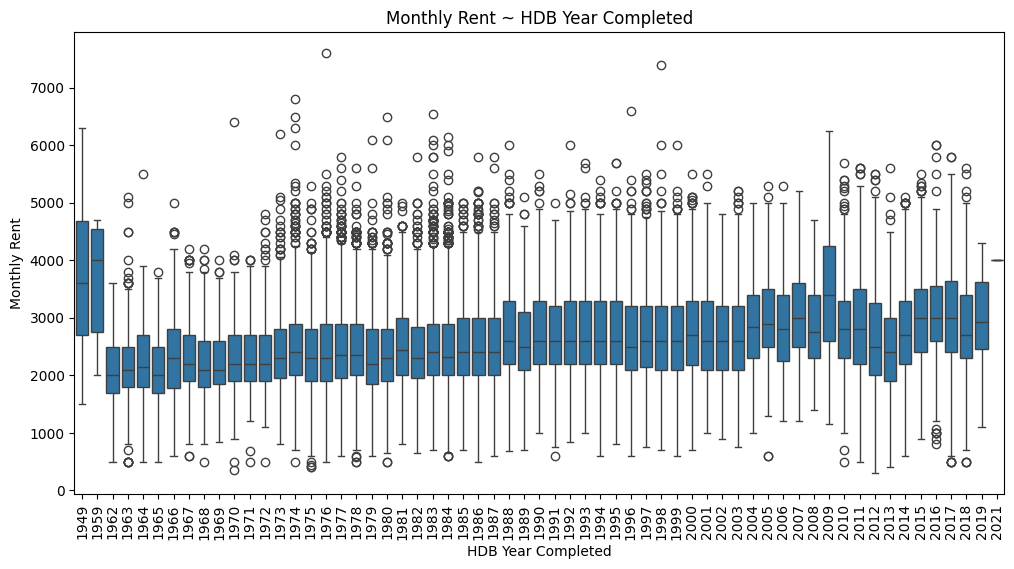

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_completed', y='monthly_rent', data=hdb_rental_df_processed)
plt.title('Monthly Rent ~ HDB Year Completed')
plt.xlabel('HDB Year Completed')
plt.ylabel('Monthly Rent')
plt.xticks(rotation=90)
plt.show()

The scatter plot and the linear regression line indicate that there is a positive correlation between the max floor level and the monthly rent.

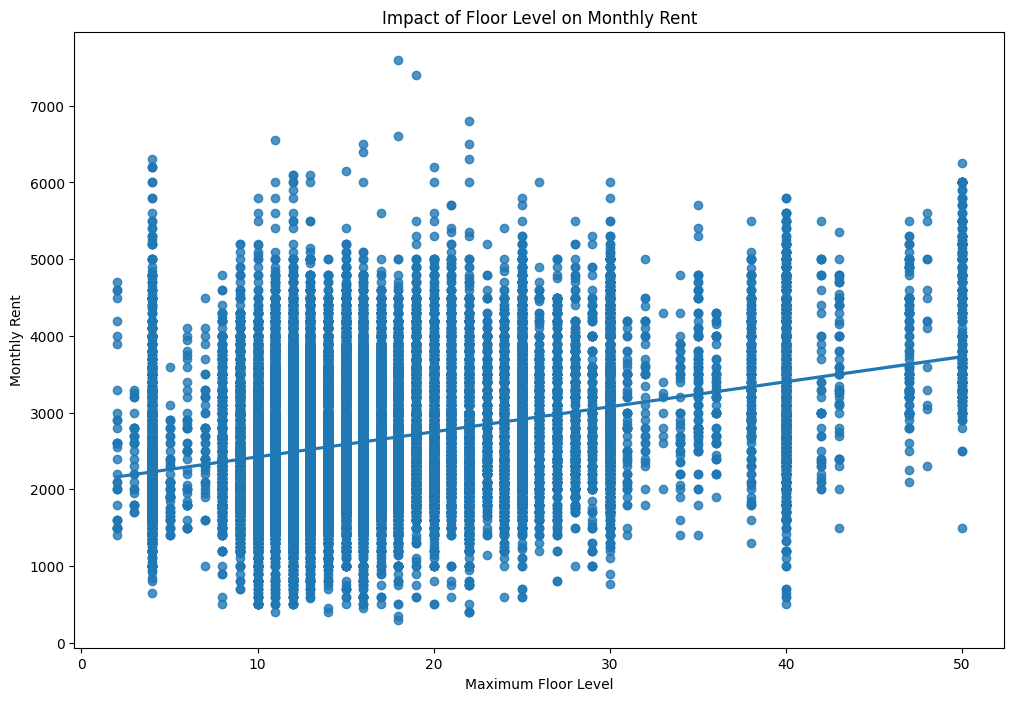

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x='max_floor_lvl', y='monthly_rent', data=hdb_rental_df_processed)
plt.title('Impact of Floor Level on Monthly Rent')
plt.xlabel('Maximum Floor Level')
plt.ylabel('Monthly Rent')
plt.show()

Now we build a simple linear regression model using 3 features: max_floor_lvl,  year_completed, and total_dwelling_units. The p-value (0.00) of the F-statistics suggests that the linear model as a whole is statistically significant. Besides, all independent variables are statistically significant as well (due to the very small p-value of the t-statistics). There is a positive correlation between the max floor level and the monthly rent, year_completed, and monthly rent. However, the total dwelling units have a negative correlation with the monthly rent.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

poly_est = smf.ols( 'monthly_rent ~ max_floor_lvl + year_completed + total_dwelling_units', data=hdb_rental_df_processed ).fit()
poly_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           monthly_rent   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     4944.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:36:11   Log-Likelihood:            -9.3924e+05
No. Observations:              118073   AIC:                         1.878e+06
Df Residuals:                  118069   BIC:                         1.879e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4222.8868    392.308    -10.764      0.000   -4991.805   -3453.969
max_floor_lvl           36.5341      0.415     88.108      0.000      35.721      37.347
year_completed           3.2770      0.198     16.549      0.000       2.889       3.665
total_dwelling_units    -1.9715      0.038    -51.493      0.000      -2.047      -1.896
==============================================================================
Omnibus:                     4812.959   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5419.897
Skew:                           0.520   Prob(JB):                         0.00
Kurtosis:                       3.143   Cond. No.                     3.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By plotting the relationship between the rent approval date and the monthly date, we observe that the monthly rent dramatically increased in 2022 and remains high in recent months.

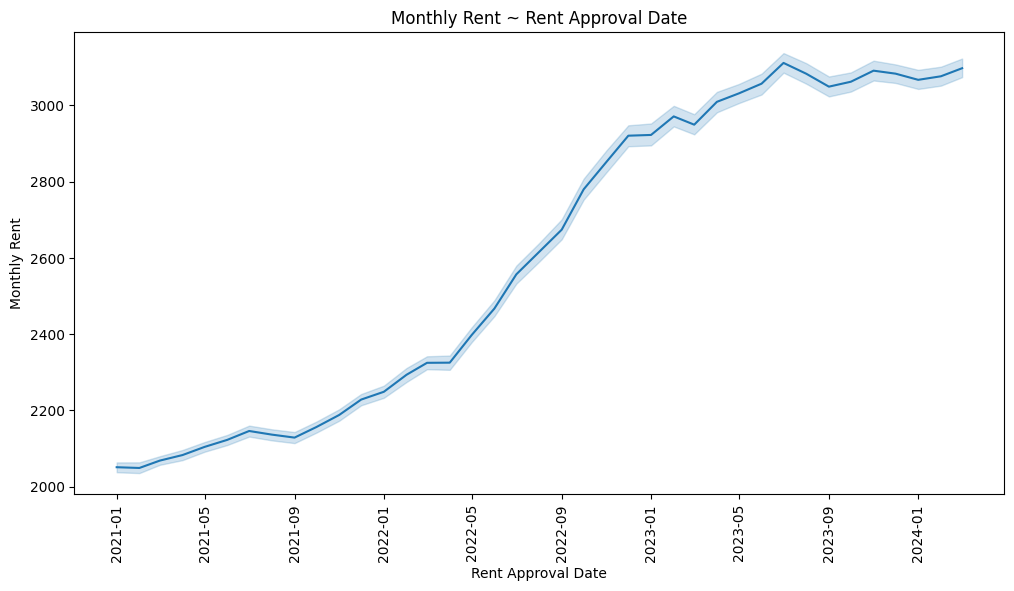

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='rent_approval_date', y='monthly_rent', data=hdb_rental_df_processed)
plt.title('Monthly Rent ~ Rent Approval Date')
plt.xlabel('Rent Approval Date')
plt.ylabel('Monthly Rent')
plt.xticks(rotation=90)
plt.show()

For categorical variables, we draw boxplots to explore their relationship with monthly rent. No enlightening patterns are discovered.

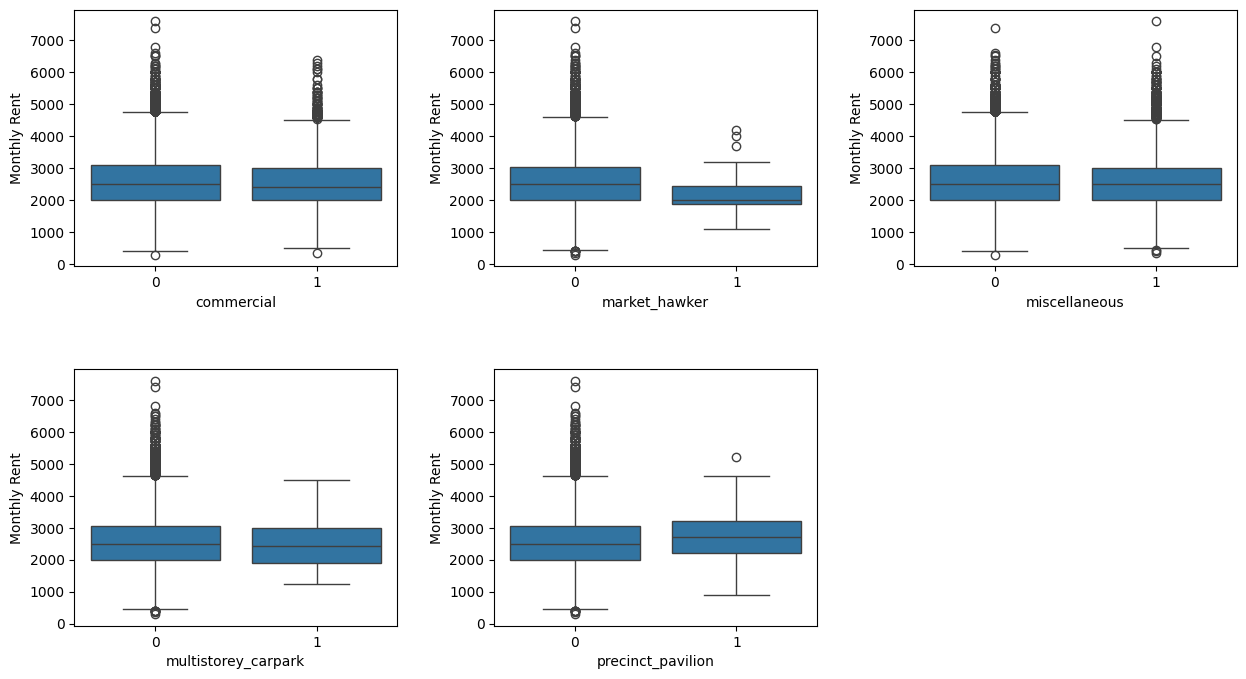

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()
one_hot_features = ["commercial", "market_hawker", "miscellaneous", "multistorey_carpark", "precinct_pavilion"]

for i, feature in enumerate(one_hot_features):
    ax = axs[i]  # Get the current subplot
    sns.boxplot(x=feature, y='monthly_rent', data=hdb_rental_df_processed, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Monthly Rent')

axs[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

Lastly, we select the numerical features explore their correlation.

In [ ]:
numerical_df = hdb_rental_df_processed.select_dtypes(include=['number'])
numerical_df

,max_floor_lvl,year_completed,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,total_dwelling_units,average_floor_area_sqm,max_floor_area_sqm,min_floor_area_sqm,monthly_rent,month,year,month_increment,building_age
0,10,1975,0,0,0,0,0,144,75.23,88.0,73.0,2100,3,2021,3,46
1,10,1975,0,0,0,0,0,144,75.23,88.0,73.0,1700,4,2021,4,46
2,10,1975,0,0,0,0,0,144,75.23,88.0,73.0,1800,7,2021,7,46
3,10,1975,0,0,0,0,0,144,75.23,88.0,73.0,1750,7,2021,7,46
4,10,1975,0,0,0,0,0,144,75.23,88.0,73.0,2350,9,2021,9,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118068,17,2019,0,0,0,0,0,144,93.00,93.0,93.0,2500,3,2024,39,5
118069,17,2019,0,0,0,0,0,144,93.00,93.0,93.0,2350,3,2024,39,5
118070,19,2019,0,0,1,0,0,234,68.00,68.0,68.0,1100,3,2021,3,2
118071,19,2019,0,0,1,0,0,234,68.00,68.0,68.0,2750,6,2021,6,2


The correlation matrix demonstrates the correlation levels between all pairs of numerical features.

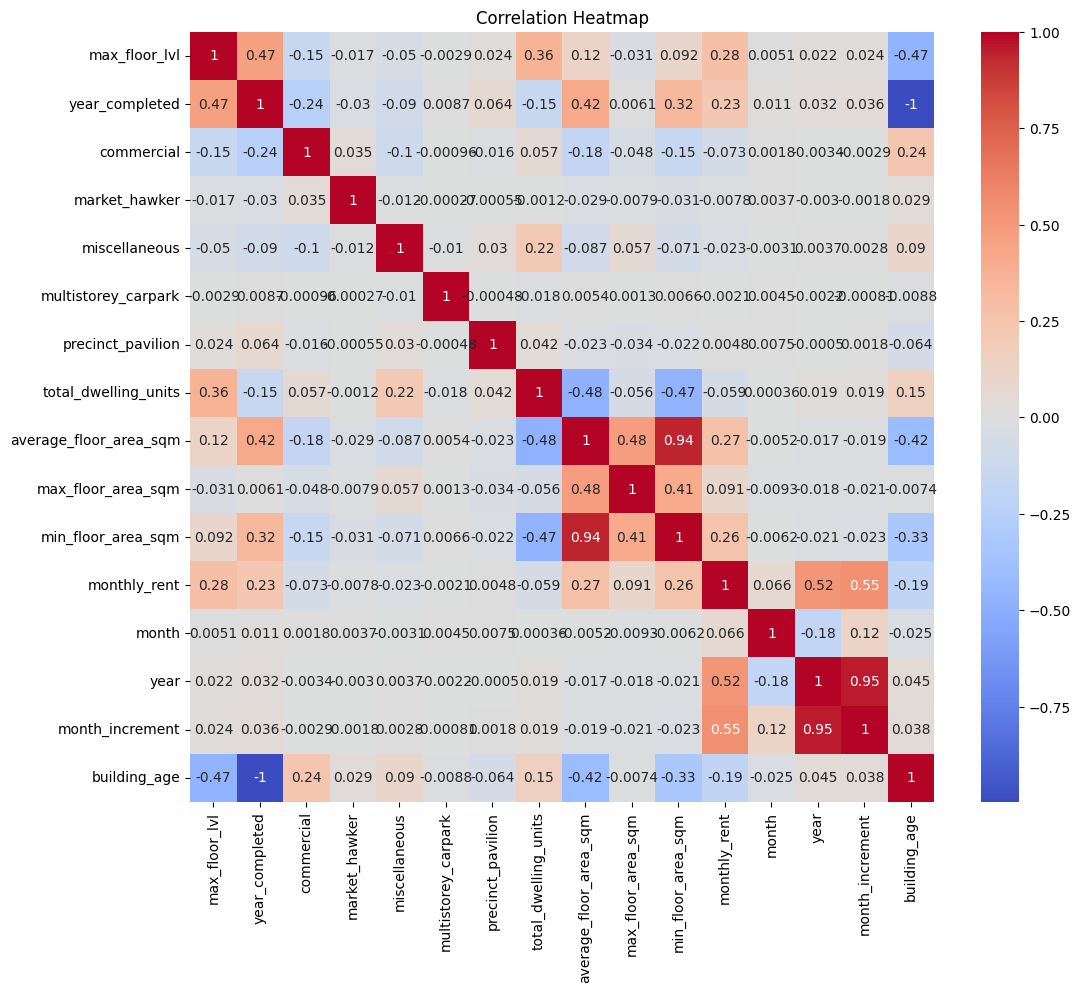

In [ ]:
import numpy as np

corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Task 5: Modeling and visualization

## Feature Preprocessing

Identify numerical features and features that should use ordinal / one hot encoding.

In [ ]:
def to_exp(features):
    return '|'.join([f'^{feature}$' for feature in features])


numerical_features = ['max_floor_lvl', 'total_dwelling_units', 'building_age', 'month_increment',
                'average_floor_area_sqm', 'max_floor_area_sqm', 'min_floor_area_sqm']
ordinal_features = ['blk_no', 'street']
onehot_features = ['town', 'month', 'commercial', 'market_hawker',
                'miscellaneous', 'multistorey_carpark', 'precinct_pavilion']
flat_type_feature = ['flat_type']
flat_type_expected_order = ['1-ROOM', '2-ROOM', '3-ROOM', '4-ROOM', '5-ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

Define the column transformer.

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, OrdinalEncoder
import numpy as np


ct = make_column_transformer(
    (StandardScaler(), make_column_selector(pattern = to_exp(numerical_features))),
    (OneHotEncoder(), make_column_selector(pattern = to_exp(onehot_features))),
    (OrdinalEncoder(categories = [flat_type_expected_order]), make_column_selector(pattern = to_exp(flat_type_feature))),
    (OrdinalEncoder(), make_column_selector(pattern = to_exp(ordinal_features)))
)

X_features = numerical_features + ordinal_features + onehot_features + flat_type_feature
y_feature = target_feature

X, y = hdb_rental_df_processed[X_features], hdb_rental_df_processed[y_feature]
print(y.head(1))
X.head(1)

   monthly_rent
0          2100


,max_floor_lvl,total_dwelling_units,building_age,month_increment,average_floor_area_sqm,max_floor_area_sqm,min_floor_area_sqm,blk_no,street,town,month,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,flat_type
0,10,144,46,3,75.23,88.0,73.0,216,ANG MO KIO AVE 1,ANG MO KIO,3,0,0,0,0,0,4-ROOM


Apply the transformation.

In [ ]:
X_transformed = ct.fit_transform(X)
print(X_transformed.shape)
print(ct.get_feature_names_out(input_features=X.columns))

(118073, 58)
['standardscaler__max_floor_lvl' 'standardscaler__total_dwelling_units'
 'standardscaler__building_age' 'standardscaler__month_increment'
 'standardscaler__average_floor_area_sqm'
 'standardscaler__max_floor_area_sqm' 'standardscaler__min_floor_area_sqm'
 'onehotencoder__town_ANG MO KIO' 'onehotencoder__town_BEDOK'
 'onehotencoder__town_BISHAN' 'onehotencoder__town_BUKIT BATOK'
 'onehotencoder__town_BUKIT MERAH' 'onehotencoder__town_BUKIT PANJANG'
 'onehotencoder__town_BUKIT TIMAH' 'onehotencoder__town_CENTRAL'
 'onehotencoder__town_CHOA CHU KANG' 'onehotencoder__town_CLEMENTI'
 'onehotencoder__town_GEYLANG' 'onehotencoder__town_HOUGANG'
 'onehotencoder__town_JURONG EAST' 'onehotencoder__town_JURONG WEST'
 'onehotencoder__town_KALLANG/WHAMPOA' 'onehotencoder__town_MARINE PARADE'
 'onehotencoder__town_PASIR RIS' 'onehotencoder__town_PUNGGOL'
 'onehotencoder__town_QUEENSTOWN' 'onehotencoder__town_SEMBAWANG'
 'onehotencoder__town_SENGKANG' 'onehotencoder__town_SERANGOON'
 'on

## Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=test_ratio, random_state=RNG)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((94458, 58), (23615, 58), (94458, 1), (23615, 1))

## Training and Testing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score


class ModellingPipeline():
    def __init__(self, X_train, X_test, y_train, y_test):
        self.models = [
            DummyRegressor(strategy="mean"),
            LinearRegression(),
            RandomForestRegressor(random_state=RNG, n_estimators=100, n_jobs=-1),
            AdaBoostRegressor(random_state=RNG, n_estimators = 50),
            MLPRegressor(hidden_layer_sizes=(100, 20), activation='relu', solver='adam', learning_rate_init=0.001, random_state=RNG)
        ]
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
    def train(self):
        print("==================")
        for model in self.models:
            print(f"training {model} model")
            model.fit(self.X_train, self.y_train)

    def test_and_select(self):
        rmse_arr = []
        mape_arr = []
        print("==================")
        for model in self.models:
            print(f"testing {model} model")
            y_pred = model.predict(self.X_test)
            rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
            mape = mean_absolute_percentage_error(self.y_test, y_pred)
            print(f"RMSE:", rmse)
            print(f"MAPE:", mape)
            rmse_arr.append(rmse)
            mape_arr.append(mape)
        min_mape = min(mape_arr)
        optimal_model = self.models[mape_arr.index(min_mape)]
        print("==================")
        print(f"Best model: {optimal_model}")
        return optimal_model


pipeline = ModellingPipeline(X_train, X_test, y_train, y_test)
pipeline.train()
pipeline.test_and_select()

training DummyRegressor() model
training LinearRegression() model
training RandomForestRegressor(n_jobs=-1, random_state=42) model
/tmp/ipykernel_639/461097426.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(self.X_train, self.y_train)
training AdaBoostRegressor(random_state=42) model
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
training MLPRegressor(hidden_layer_sizes=(100, 20), random_state=42) model
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

LinearRegression()

## Visualization

Residual plot (for the best model) indicates heteroscedasticity, suggesting that prediction errors increase with the magnitude of predicted values. The funnel shape of the plot points to a possible non-linear relationship between features and the target variable. Outliers, particularly at higher predicted values, are also evident. From this plot, the overall performance of our model makes it hard to call it satisfactory. Further exploration of this modeling task needs to be done.

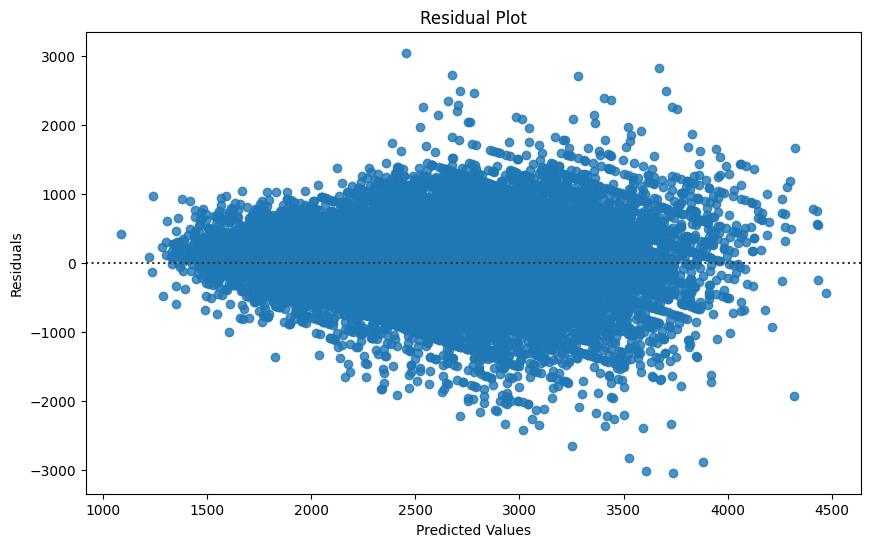

In [ ]:
selected_model = pipeline.models[1]
y_pred = selected_model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test-y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The Random Forest model automatically measures each feature's importance during training. Now we plot each feature with its importance in descending order. All feature importance values should sum up to 1. As shown in the plot below, the most significant features include month_increment, flat-type, block number, max floor level, average floor area, total dwelling units, building age, street name, max floor area and min floor area. Notice that month_increment, average floor area, building age, max floor area and min floor area are our hand-crafted features in the preceding sections, which demonstrate the effects of feature engineering.

Feature ranking:
1 onehotencoder__multistorey_carpark_0 4.239485854871063e-06
2 onehotencoder__multistorey_carpark_1 4.469067665489729e-06
3 onehotencoder__market_hawker_1 1.1205976463613934e-05
4 onehotencoder__market_hawker_0 1.3157354082777689e-05
5 onehotencoder__precinct_pavilion_1 5.2517035865384256e-05
6 onehotencoder__precinct_pavilion_0 5.735453285526433e-05
7 onehotencoder__town_YISHUN 0.0004385743333650333
8 onehotencoder__town_MARINE PARADE 0.0004640878435003481
9 onehotencoder__town_PUNGGOL 0.0006314531964348633
10 onehotencoder__town_PASIR RIS 0.0006806526426243242
11 onehotencoder__town_ANG MO KIO 0.0007710893436636328
12 onehotencoder__town_BUKIT TIMAH 0.0010535599319977597
13 onehotencoder__town_SEMBAWANG 0.0010567577876056708
14 onehotencoder__town_SERANGOON 0.0011695960611776202
15 onehotencoder__town_TAMPINES 0.0012221329208792768
16 onehotencoder__town_TOA PAYOH 0.0013675538987111542
17 onehotencoder__town_BUKIT BATOK 0.0014221408414689075
18 onehotencoder__town_SE

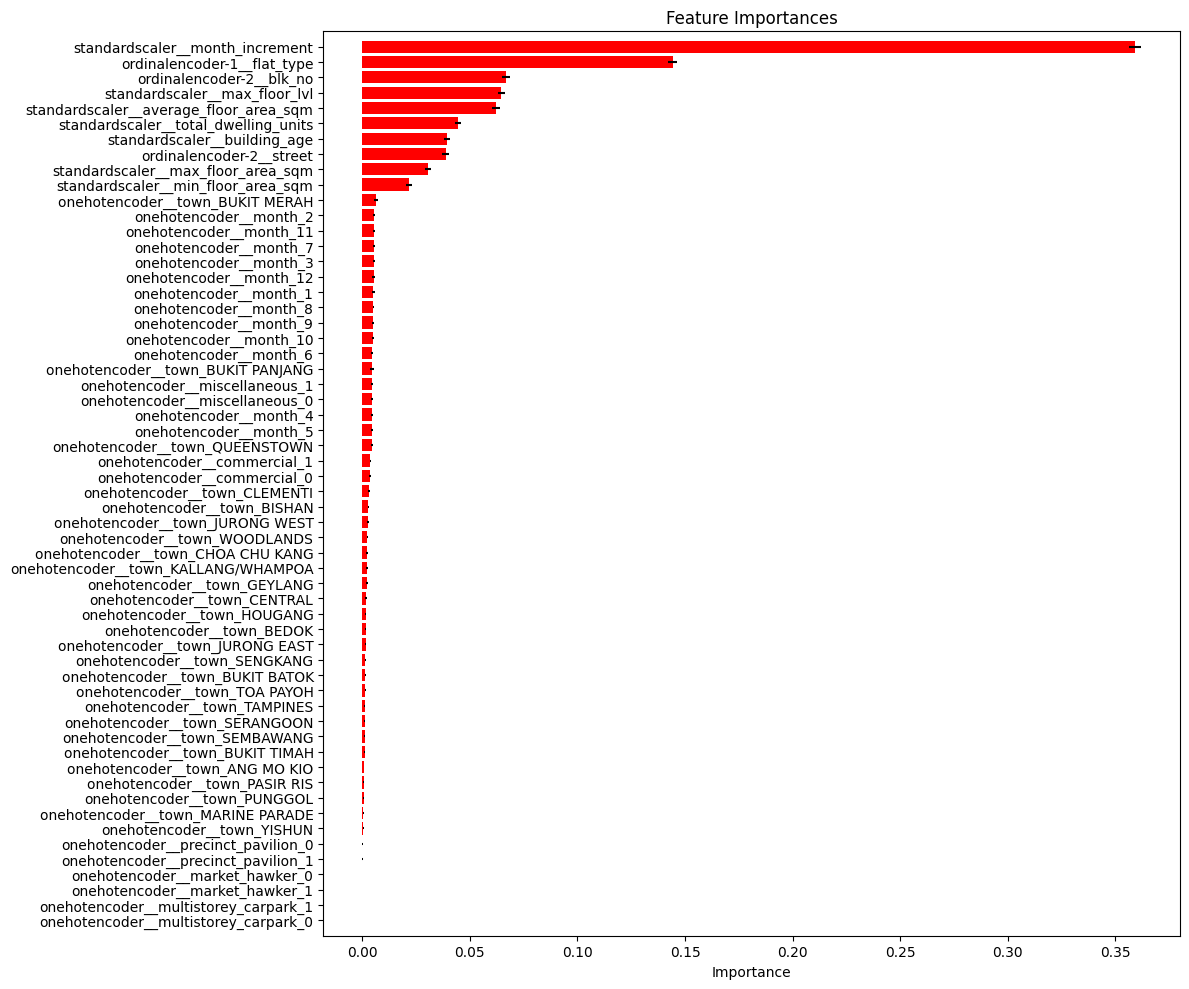

In [ ]:
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)
    
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(len(feature_names)):
        print(f+1, feature_names[indices[f]], importances[indices[f]])

    # Plot the feature importances
    plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
    plt.title("Feature Importances")
    plt.barh(range(len(feature_names)), importances[indices],
             color="r", xerr=std[indices], align="center")
    plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
    plt.ylim([-1, len(feature_names)])
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

rf_model = pipeline.models[2]
plot_feature_importances(rf_model, ct.get_feature_names_out(input_features=X.columns))

# Task 6: Report insights and conclusions

We have accomplished a comprehensive study on the rental prices of Housing Development Board (HDB) flats in Singapore. We gathered and analyzed historical rental price data to explore the relationship between rental prices and various housing attributes such as location, year of construction, floor area, and building age.

Our analysis involved multiple stages including data collection, preprocessing, exploratory data analysis, feature engineering, and predictive modeling. We utilized datasets from multiple sources, merged and cleaned them to create a comprehensive dataset suitable for analysis. Key features like 'building age' and 'month increment' were engineered to enrich our data which proved crucial for the subsequent modeling phase.

For modeling, we employed several machine learning algorithms, comparing their performance to select the most accurate model based on the mean absolute percentage error and root mean squared error metrics. Visualizations were extensively used to provide insights into the data distribution and the influence of various features on rental prices.

The project concluded with the selection of an optimal model, which was then used to forecast rental prices. This comprehensive approach not only provided insights into factors influencing rental prices but also equipped homeowners with predictive tools to make informed decisions regarding rental pricing.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4129b06b-253d-4e37-80a0-3c25240622cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>